In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Introduction to ML
### from video
### Spaceship Titanic Kaggle

In [3]:
passenger_data = pd.read_csv(
    "../../KaggleCompetitions/SpaceshipTitanic/data/train.csv", 
    true_values = ["True"], 
    false_values = ["False"]
)

In [4]:
passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
passenger_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
passenger_data.HomePlanet.value_counts(dropna = False)

HomePlanet
Earth     4602
Europa    2131
Mars      1759
NaN        201
Name: count, dtype: int64

In [7]:
passenger_data.CryoSleep.value_counts(dropna = False)

CryoSleep
False    5439
True     3037
NaN       217
Name: count, dtype: int64

In [8]:
passenger_data.VIP.value_counts(dropna = False)

VIP
False    8291
NaN       203
True      199
Name: count, dtype: int64

In [9]:
destinations = passenger_data.Destination.value_counts().sort_values(ascending = True)

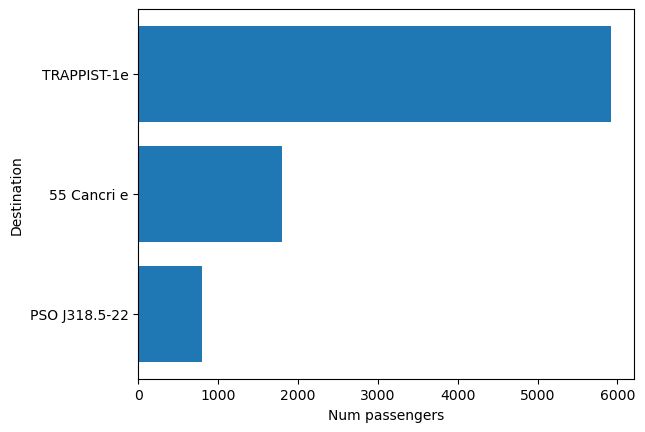

In [10]:
plt.barh(destinations.index, destinations)

plt.xlabel("Num passengers")
plt.ylabel("Destination")

plt.show()

Check expenses comnbined

In [11]:
num_passengers = passenger_data.PassengerId \
    .str.split("_", expand = True)[0] \
    .value_counts().value_counts()

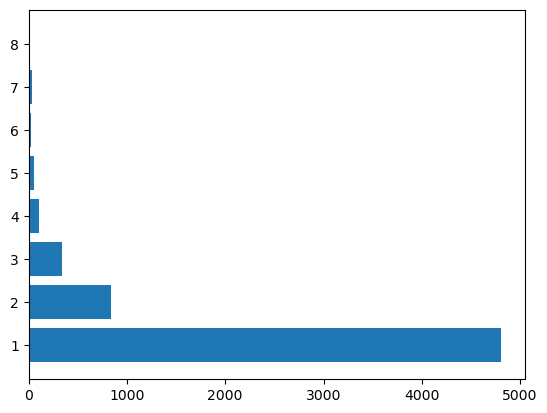

In [12]:
plt.barh(num_passengers.index, num_passengers)
plt.show()

In [13]:
# passenger_data = passenger_data.dropna()

In [14]:
passenger_attributes = passenger_data.drop(columns = ["Transported"]) # X
passenger_labels = passenger_data["Transported"] # y

In [15]:
passenger_attributes.drop(columns = ["Name", "Cabin", "PassengerId"], inplace = True)

In [16]:
passenger_attributes = pd.get_dummies(passenger_attributes, drop_first = True)

In [17]:
passenger_attributes = passenger_attributes.dropna()

In [18]:
passenger_labels = passenger_labels[passenger_attributes.index]

In [19]:
len(passenger_attributes), len(passenger_labels)

(7620, 7620)

In [20]:
passenger_attributes

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,True,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,False,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,True,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,True,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,True,False,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,True,True,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,False,False,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,True,False,False,False,False,False


In [21]:
#passenger_attributes.columns.tolist()

In [22]:
scaler = MinMaxScaler()

In [23]:
passenger_attributes_scaled = scaler.fit_transform(passenger_attributes)

In [24]:
model = LogisticRegression()

In [25]:
model.fit(passenger_attributes, passenger_labels)

C:\Users\diana\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
model_scaled = LogisticRegression()
model_scaled.fit(passenger_attributes_scaled, passenger_labels)

LogisticRegression()

In [27]:
model_max_iter = LogisticRegression(max_iter=1000)
model_max_iter.fit(passenger_attributes, passenger_labels)

LogisticRegression(max_iter=1000)

In [28]:
model.score(passenger_attributes, passenger_labels) # score on test set 0.792

0.7896325459317586

In [29]:
model_scaled.score(passenger_attributes_scaled, passenger_labels) # score on test set 0.763

0.7653543307086614

In [30]:
model_max_iter.score(passenger_attributes, passenger_labels)

0.7902887139107612

In [31]:
feature_weights = pd.DataFrame([i for i in zip(passenger_attributes.columns.to_list(), model.coef_[0], model_scaled.coef_[0], model_max_iter.coef_[0])], columns=["feature", "coef", "coef_scaled", "coef_converged"])
feature_weights

,feature,coef,coef_scaled,coef_converged
0,Age,-0.001065,-0.913635,-0.007969
1,RoomService,-0.001389,-8.183845,-0.001493
2,FoodCourt,0.000570,4.876950,0.000525
3,ShoppingMall,0.000589,4.607125,0.000517
4,Spa,-0.001872,-11.274972,-0.001994
5,VRDeck,-0.001691,-10.242091,-0.001808
6,HomePlanet_Europa,1.669031,1.423806,2.113226
7,HomePlanet_Mars,0.508021,0.508904,0.635552
8,CryoSleep_True,1.357620,1.724707,1.207234
9,Destination_PSO J318.5-22,-0.337715,-0.399978,-0.477567


In [32]:
feature_weights.sort_values("coef", key=abs, ascending = False).set_index("feature")

,coef,coef_scaled,coef_converged
feature,,,
HomePlanet_Europa,1.669031,1.423806,2.113226
CryoSleep_True,1.357620,1.724707,1.207234
Destination_TRAPPIST-1e,-0.618376,-0.428110,-0.547921
HomePlanet_Mars,0.508021,0.508904,0.635552
Destination_PSO J318.5-22,-0.337715,-0.399978,-0.477567
VIP_True,-0.014509,-0.472278,-0.123812
Spa,-0.001872,-11.274972,-0.001994
VRDeck,-0.001691,-10.242091,-0.001808
RoomService,-0.001389,-8.183845,-0.001493


In [33]:
feature_weights.sort_values("coef_scaled", key=abs, ascending = False).set_index("feature")

,coef,coef_scaled,coef_converged
feature,,,
Spa,-0.001872,-11.274972,-0.001994
VRDeck,-0.001691,-10.242091,-0.001808
RoomService,-0.001389,-8.183845,-0.001493
FoodCourt,0.000570,4.876950,0.000525
ShoppingMall,0.000589,4.607125,0.000517
CryoSleep_True,1.357620,1.724707,1.207234
HomePlanet_Europa,1.669031,1.423806,2.113226
Age,-0.001065,-0.913635,-0.007969
HomePlanet_Mars,0.508021,0.508904,0.635552


In [34]:
test_passenger_data = pd.read_csv("../../KaggleCompetitions/SpaceshipTitanic/data/test.csv", true_values = ["True"], false_values = ["False"])

In [35]:
test_passenger_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [36]:
test_passenger_data = test_passenger_data.set_index("PassengerId")
test_passenger_data.drop(columns = ["Name", "Cabin"], inplace=True)
test_passenger_data = pd.get_dummies(test_passenger_data, drop_first = True)


In [37]:
test_passenger_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
PassengerId,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,False,False,False,False,True,False
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,True,False,False,False,True,False
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,False,False,False,False,True,False
9271_01,NaN,0.0,0.0,0.0,0.0,0.0,False,True,True,False,False,False


In [38]:
test_passenger_data = test_passenger_data.fillna(0)

In [39]:
test_passenger_data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
PassengerId,,,,,,,,,,,,
0013_01,27.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
0018_01,19.0,0.0,9.0,0.0,2823.0,0.0,False,False,False,False,True,False
0019_01,31.0,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False,False
0021_01,38.0,0.0,6652.0,0.0,181.0,585.0,True,False,False,False,True,False
0023_01,20.0,10.0,0.0,635.0,0.0,0.0,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9266_02,34.0,0.0,0.0,0.0,0.0,0.0,False,False,True,False,True,False
9269_01,42.0,0.0,847.0,17.0,10.0,144.0,False,False,False,False,True,False
9271_01,0.0,0.0,0.0,0.0,0.0,0.0,False,True,True,False,False,False


In [40]:
test_passenger_data_scaled = scaler.transform(test_passenger_data)

In [41]:
predictions = model.predict(test_passenger_data)

In [42]:
predictions_scaled = model_scaled.predict(test_passenger_data_scaled)

In [43]:
test_passenger_data["Transported"] = predictions

In [44]:
submission = test_passenger_data[["Transported"]]

In [45]:
submission.to_csv("submission_from_lecture.csv")

In [46]:
submission.loc[:, "Transported"] = predictions_scaled

In [47]:
submission.to_csv("submission_from_lecture_scaled.csv")